In [10]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}

</style>
""")

# The above HTML code is for grtting the figure in center alignment

# Basic Imports

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# Reading Data 

In [12]:
df = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8 (1).xls',index_col=0)
df.head()

Age Gender EducationBackground MaritalStatus    EmpDepartment  \
EmpNumber                                                                  
E1001000    32   Male           Marketing        Single            Sales   
E1001006    47   Male           Marketing        Single            Sales   
E1001007    40   Male       Life Sciences       Married            Sales   
E1001009    41   Male     Human Resources      Divorced  Human Resources   
E1001010    60   Male           Marketing        Single            Sales   

                EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
EmpNumber                                                              
E1001000   Sales Executive           Travel_Rarely                10   
E1001006   Sales Executive           Travel_Rarely                14   
E1001007   Sales Executive       Travel_Frequently                 5   
E1001009           Manager           Travel_Rarely                10   
E1001010   Sales Executive           Travel_Rarely                16   

           EmpEducationLevel  EmpEnvironmentSatisfaction  ...  \
EmpNumber                                                 ...   
E1001000                   3                           4  ...   
E1001006                   4                           4  ...   
E1001007                   4                           4  ...   
E1001009                   4                           2  ...   
E1001010                   4                           1  ...   

           EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
EmpNumber                                                            
E1001000                             4                          10   
E1001006                             4                          20   
E1001007                             3                          20   
E1001009                             2                          23   
E1001010                             4                          10   

           TrainingTimesLastYear  EmpWorkLifeBalance  \
EmpNumber                                              
E1001000                       2                   2   
E1001006                       2                   3   
E1001007                       2                   3   
E1001009                       2                   2   
E1001010                       1                   3   

           ExperienceYearsAtThisCompany ExperienceYearsInCurrentRole  \
EmpNumber                                                              
E1001000                             10                            7   
E1001006                              7                            7   
E1001007                             18                           13   
E1001009                             21                            6   
E1001010                              2                            2   

           YearsSinceLastPromotion  YearsWithCurrManager  Attrition  \
EmpNumber                                                             
E1001000                         0                     8         No   
E1001006                         1                     7         No   
E1001007                         1                    12         No   
E1001009                        12                     6         No   
E1001010                         2                     2         No   

           PerformanceRating  
EmpNumber                     
E1001000                   3  
E1001006                   3  
E1001007                   4  
E1001009                   3  
E1001010                   3  

[5 rows x 27 columns]

# Information about the data

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200 entries, E1001000 to E100998
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           1200 non-null   int64 
 1   Gender                        1200 non-null   object
 2   EducationBackground           1200 non-null   object
 3   MaritalStatus                 1200 non-null   object
 4   EmpDepartment                 1200 non-null   object
 5   EmpJobRole                    1200 non-null   object
 6   BusinessTravelFrequency       1200 non-null   object
 7   DistanceFromHome              1200 non-null   int64 
 8   EmpEducationLevel             1200 non-null   int64 
 9   EmpEnvironmentSatisfaction    1200 non-null   int64 
 10  EmpHourlyRate                 1200 non-null   int64 
 11  EmpJobInvolvement             1200 non-null   int64 
 12  EmpJobLevel                   1200 non-null   int64 
 13  EmpJobSatisfa

# Insight about the Data

## Employee Department Analysis

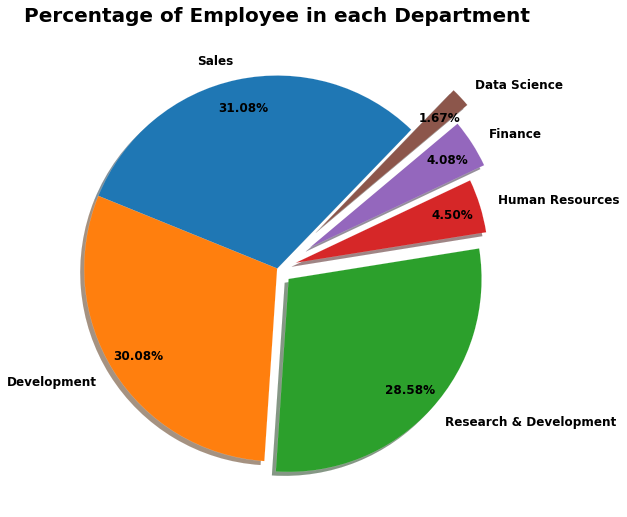

In [14]:
# Using pie chart for department analysis
topic_1=[]
for i in df['EmpDepartment'].value_counts():
    topic_1.append(i)
    
wedgeprops = {"linewidth": 0.1, 'width':1, "edgecolor":"w"}
plt.figure(figsize = (10,15))

plt.pie(topic_1,labels = ['Sales', 'Development',"Research & Development",'Human Resources',
       'Finance','Data Science'],explode = [0,0,0.08,0.1,0.2,0.3], autopct = "%0.2f%%", startangle =46,shadow = True,
        pctdistance = 0.85,wedgeprops = wedgeprops,textprops = {"fontsize":12,"fontweight":"bold"},rotatelabels=False) 
plt.title("Percentage of Employee in each Department",fontsize=20,fontweight='bold')
plt.tight_layout(pad=6)

In the given data, Employee Department are categorized into six parts:

  * **Sales:**  This Department accounts for 31.08% of the whole number of employees.
  * **Research & Development:** This Department accounts for 28.58% of total employees. R&D departments work is to research and     innovate new products.  
  * **Development:** 30.08% of the employees belong to this department.
  * **Finance:** This Department is responsible for managing funds for the company and has 4.08% of the total work force.
  * **Human Resources:** This Department is responsible for managing the employees recuriting and firing employees. And accounts 
    for 4.50% of the total workforce.
  * **Data Science:** This Department accounts for 1.67% of the total workforce. 

# Employee Education Background

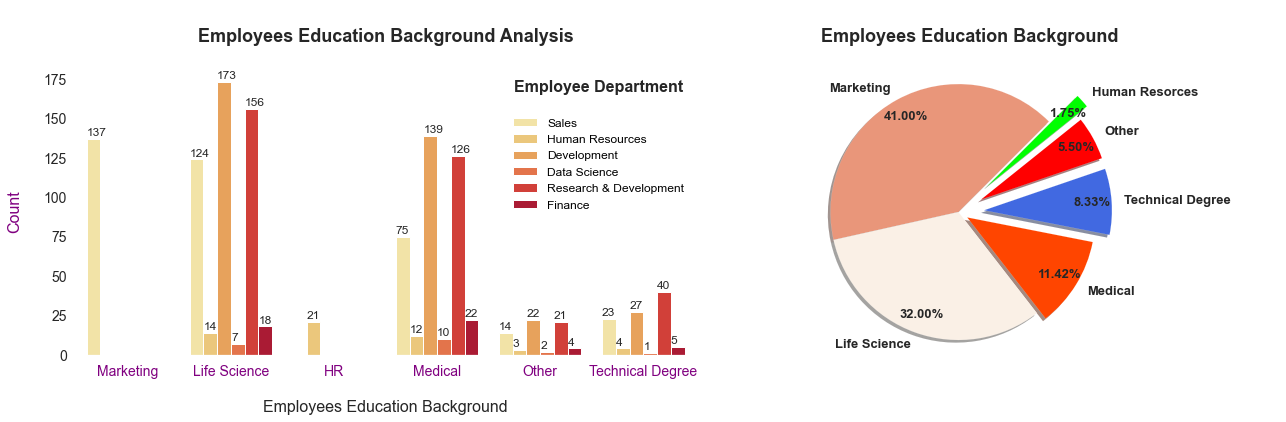

In [15]:
# Using seaborn for analysis

sns.set(rc={"font.size":12,"axes.titlesize":16,"axes.labelsize":16,"xtick.labelsize":14,"ytick.labelsize":14,
            "legend.fontsize":12,'axes.grid' : False,'axes.facecolor': 'w'})

# Using pie chart for employees education background
topic_2=[]
for i in df['EducationBackground'].value_counts():
    topic_2.append(i)
    
wedgeprops = {"linewidth": 0.1, 'width':1, "edgecolor":"white"}
color = ["darksalmon","linen","orangered","royalblue","red","lime"]

plt.figure(figsize = (20,8))

#countplot chart for employees education background for department analysis
plt.subplot(1,2,1)
ax = sns.countplot(x=df['EducationBackground'],hue= df["EmpDepartment"],palette="YlOrRd")
plt.title("\nEmployees Education Background Analysis\n",fontweight="bold",fontsize=18)
plt.xlabel("\nEmployees Education Background")
plt.xticks(ticks=[0,1,2,3,4,5],labels=["Marketing","Life Science","HR","Medical","Other","Technical Degree"],
           color="purple")
plt.ylabel("Count\n",color="purple")
legend = plt.legend()
legend.set_title("Employee Department\n",prop={"size":16,"weight":"bold"})
plt.setp(legend.get_texts(), color='black')
legend.draw_frame(False)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+2))
plt.tight_layout(pad=2)

plt.subplot(1,2,2)
plt.pie(topic_2,labels = ["Marketing","Life Science","Medical","Technical Degree","Other","Human Resorces"],
        explode = [0,0,0.08,0.2,0.2,0.3], autopct = "%0.2f%%", startangle =45,shadow = True,
        pctdistance = 0.85,wedgeprops = wedgeprops,textprops = {"fontsize":13,"fontweight":"bold"},rotatelabels=False,
        colors = color) 
plt.title("Employees Education Background\n",fontsize=18,fontweight='bold',)
plt.tight_layout(pad=7)
plt.axis('equal')
plt.show()

* Most of the employees are from **Marketing** background, around 41% of the totalworkforce.
* After Marketing, **Life Science** accounts for 32% of the employees.
* Employees with **Medical** background is about 11.42%.
* Employees with **Technical** degree is about 8.33%.
* Employess with **Human Resource & Other** educational background is about 1.75% & 5.50% respectively.

# Marital Status Analysis with Attriation Rate

In [16]:
# Using crosstab for using exact number to plot graph

pd.crosstab(df['MaritalStatus'],df['OverTime'],margins=True)

OverTime        No  Yes   All
MaritalStatus                
Divorced       183   85   268
Married        390  158   548
Single         274  110   384
All            847  353  1200

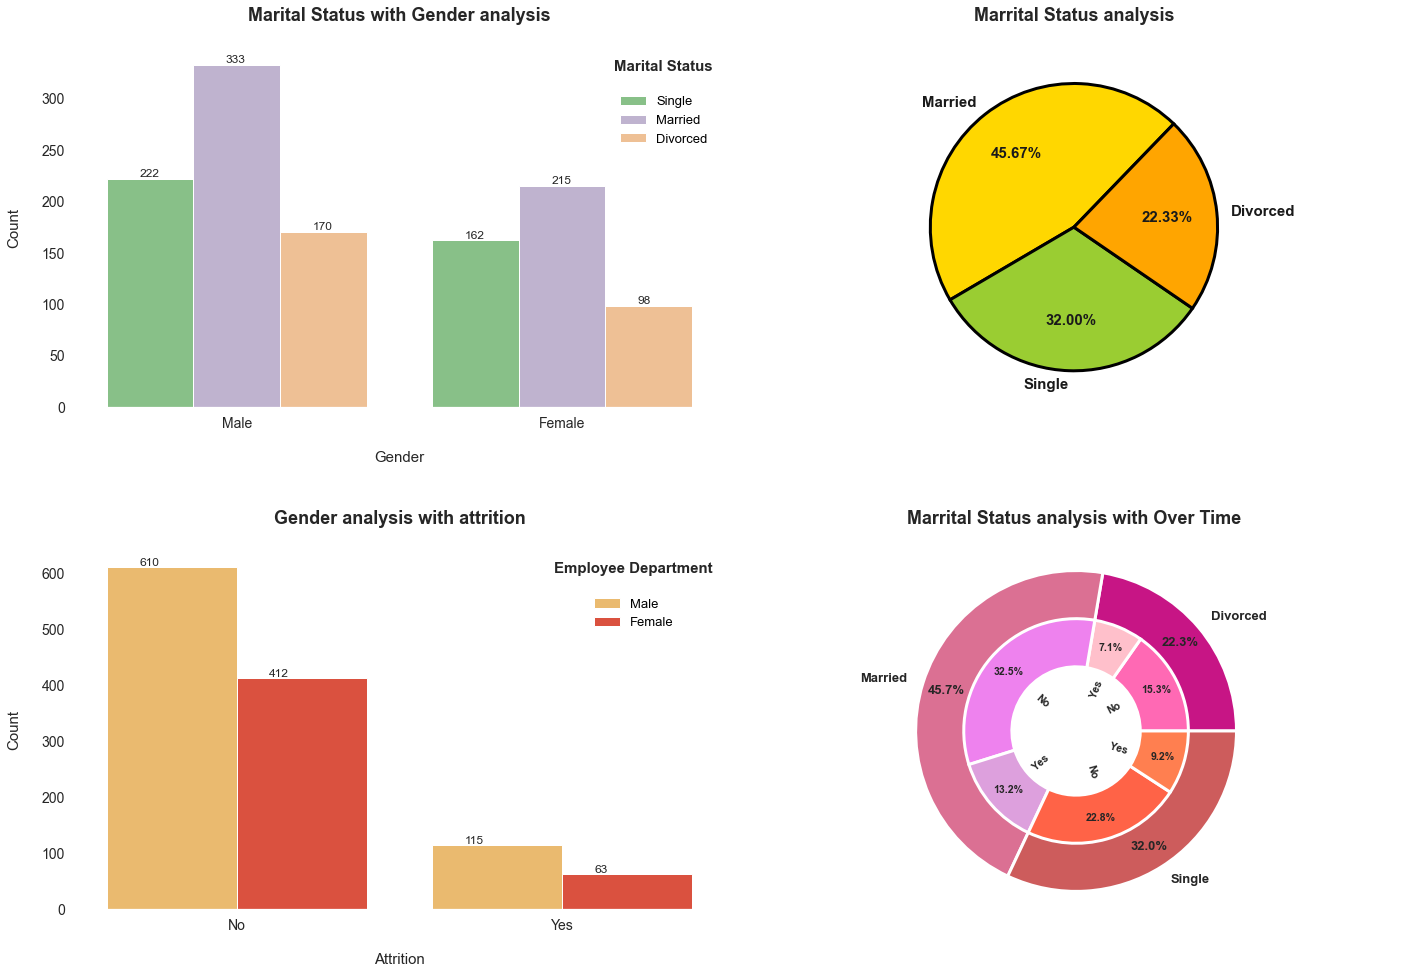

In [17]:
sns.set(rc={"font.size":12,"axes.titlesize":18,"axes.labelsize":15,"xtick.labelsize":14,"ytick.labelsize":14,
            "legend.fontsize":12,'axes.grid' : False,'axes.facecolor': 'white'})

#pie chart data
topic_2=[]
for i in df['MaritalStatus'].value_counts():
    topic_2.append(i)

topic_3=[]
for i in df['OverTime'].value_counts():
    topic_3.append(i)
    
wedgeprops = {"linewidth": 3, 'width':1, "edgecolor":"black"}
color = ['gold','yellowgreen','orange']

plt.figure(figsize = (20,14))

plt.subplot(2,2,1)

#countplot for gender vs Marital Status
ax = sns.countplot(x=df['Gender'],hue= df["MaritalStatus"],palette="Accent")
plt.title("Marital Status with Gender analysis\n",fontweight="bold",fontsize=18)
plt.xlabel("\nGender")
plt.ylabel("Count\n")
legend = plt.legend(prop={"size":13})
legend.set_title("Marital Status\n",prop={"size":15,"weight":"bold"})
plt.setp(legend.get_texts(), color='black')
legend.draw_frame(False)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+2))


#pie chart for Marital Status analysis
plt.subplot(2,2,2)
plt.pie(topic_2,labels=["Married","Single","Divorced"],
        explode = [0,0,0], autopct = "%0.2f%%", startangle =46,
        pctdistance = 0.65,wedgeprops = wedgeprops,textprops = {"fontsize":15,"fontweight":"bold",'color':"k"},
        rotatelabels=False,
        colors = color) 
plt.title("Marrital Status analysis\n",fontsize=18,fontweight='bold',)

#countplot for gender vs attrition
plt.subplot(2,2,3)
ax = sns.countplot(x= df["Attrition"],hue=df['Gender'],palette="YlOrRd")
plt.title("\nGender analysis with attrition\n",fontweight="bold",fontsize=18)
plt.xlabel("\nAttrition")
plt.ylabel("Count\n")
legend = plt.legend(prop={"size":13})
legend.set_title("Employee Department\n",prop={"size":15,"weight":"bold"})
plt.setp(legend.get_texts(), color='black')
legend.draw_frame(False)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+2))
plt.tight_layout(pad=2)

#donut chart for Marrital Status analysis with Over Time
plt.subplot(2,2,4)
plt.title("\nMarrital Status analysis with Over Time\n",fontsize=18,fontweight="bold")
plt.pie([268,548,384], radius=1,
        colors=['mediumvioletred', 'palevioletred','indianred','lightcoral','forestgreen'],
        labels=["Divorced","Married","Single"], 
        autopct='%.1f%%',
        pctdistance=0.85, textprops = {"fontsize":13,"fontweight":"bold"},
        wedgeprops=dict(width=0.6, edgecolor='white',linewidth=3))

plt.pie([183,85,390,158,274,110], radius=0.7,
        colors=['hotpink','pink', 'violet',
                'plum', 'tomato','coral', 'salmon','lightsalmon','khaki','yellow'],
        wedgeprops=dict(width=0.3, edgecolor='w',linewidth=3),textprops = {"fontsize":10.5,"fontweight":"bold"},
         labels=["No","Yes","No","Yes","No","Yes"],autopct='%.1f%%',
        pctdistance=0.8, labeldistance=0.3, rotatelabels=True)


plt.axis('equal')
plt.show()

* Company have **more** male employees than female employees.
* Male employees are doing attrition in the company than female employees.
* Company have;
     1. Single -**32%**.
     2. Married-**45.67%**.
     3. Divorced-**22.33%**.
     
* Married employees do overtime more, when compared to Single and Divorced employees.

# Department wise Performance Rating

In [18]:
#histogram graph for department wise performance
def customLegend(fig, nameSwap):
    for i, dat in enumerate(fig.data):
        for elem in dat:
            if elem == 'name':
                fig.data[i].name = nameSwap[fig.data[i].name]
    return(fig)

fig1 = px.histogram(df, x="EmpDepartment",color="PerformanceRating",barmode='group',
                    color_discrete_sequence=['darkorange','orangered','lawngreen'],
                   labels=dict(EmpDepartment="<b>Employee Department</b>"),
                   title="<b>Department vs Performance Rating</b>",width=990,template="presentation")

fig1.update_layout(title_x=0.5,title_font_size=20,font_size=11,xaxis_showgrid=False, yaxis_showgrid=False,
                   legend=dict(title="Performance Rating"))

fig1 = customLegend(fig=fig1, nameSwap = {'3': 'Excellent', '2':'Good','4':"Outstanding"}) 

fig1.show()

* Most of the employees in company performes well and are having **Excellent** rating.
* Development, Sales, R&D department has more number of excellent performers as these departments have more 
  number of employees than other departments.

# Employee Department vs Job Role

In [19]:
#histogram chart for Job Role vs Employee Department
fig2 = px.histogram(df, y="EmpJobRole",color="EmpDepartment",barmode='group',
                   labels=dict(EmpDepartment="<b>Employee Department</b>",EmpJobRole="<b>Job Role</b>"),
                   title="<b>Employee Department vs Job Role</b>",width=1000,height=700,template="ggplot2")
fig2.update_layout(title_x=0.4,title_font_size=24,font_size=14,xaxis_showgrid=False, yaxis_showgrid=False,
                  plot_bgcolor='white')
fig2.show()

* From the above chart we can find that the company have **Six department**.
* Each department has different type of job roles.
    
    1.Finance - 4 Job roles.
    
    2.R & D   - 8 Job roles.
    
    3.Human Resource -2 Job Roles.
    
    4.Data Science   -1 Job Role.
    
    5.Development    -6 Job Roles.
    
    6.Sales          -4 Job Roles.

# Performance vs Hourly Rate

In [20]:
#Histogram for Performance vs Hourly Rate
fig3 = px.histogram(df, x="EmpHourlyRate",color="PerformanceRating",barmode='group',
                color_discrete_sequence=['lime','orange','yellow'],
                   labels=dict(EmpHourlyRate="<b>Hourly Rate</b>"),
                   title="<b>Performance vs Hourly Rate</b>",width=1000,template="plotly")

fig3.update_layout(title_x=0.5,title_font_size=22,font_size=13,legend=dict(title="Performance Rating"),
                   paper_bgcolor="white",plot_bgcolor='white')

fig3 = customLegend(fig=fig3, nameSwap = {'3': 'Excellent', '2':'Good','4':"Outstanding"})

fig3.show()

# Department vs Salary Hike

In [21]:
#Histogram for Department vs Last Salary Hike 
fig4 = px.histogram(df, x="EmpDepartment",color="EmpLastSalaryHikePercent",barmode='group',
                   labels=dict(EmpHourlyRate="<b>Hourly Rate</b>"),
                   title="<b>Department vs Last Salary Hike Percent</b>",width=900,height=400,template="plotly")
fig4.update_layout(title_x=0.5,title_font_size=18,font_size=10,legend=dict(title="Salary Hike Percent"),
                   paper_bgcolor="white",plot_bgcolor='white')

fig4.show()

* In **Data Science Department**,more number of employees last salary hike was **19%** & only 1 employees last salary hike was **23%**.
* In **HR Department**,more number of employees last salary hike was **11%** & only 1 employees last salary hike was **23%**.
* In **Research & Development Department**,more number of employees last salary hike was **14%** & 6 employees last salary hike was **25%**.
* In **Sales Department**, more number of employees last salary hike was **14%** & 3 employees last salary hike was **25%**.
* In **Development Department**,more number of employees last salary hike was **13%** & 3 employees  last salary hike was **25%**.
* In **Finance Department**,more number of employees last salary hike was **12%** & only 1 employees last salary hike was **25%**.

# Analysing Employees Age

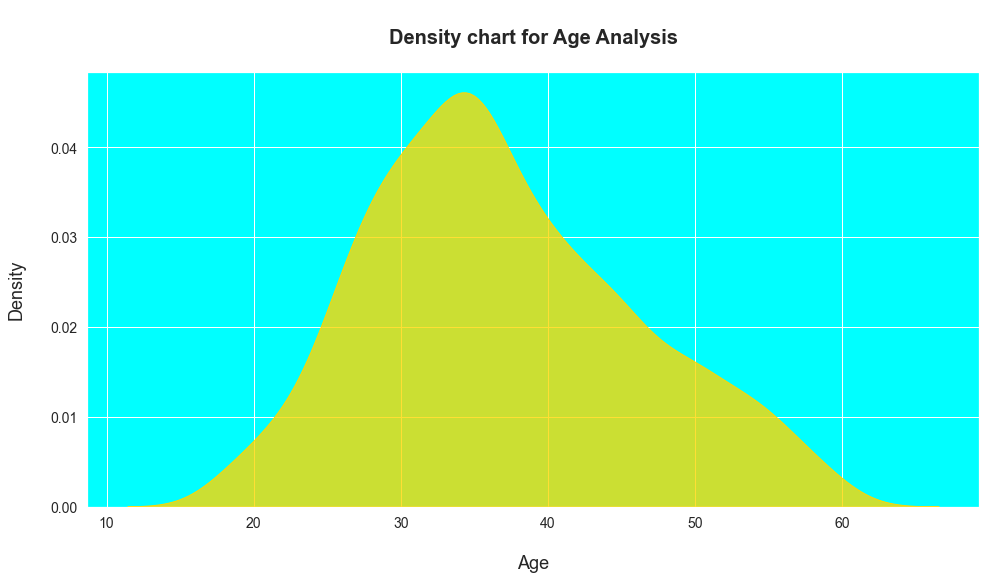

In [22]:
sns.set(rc={"font.size":12,"axes.titlesize":20,"axes.labelsize":18,"xtick.labelsize":14,"ytick.labelsize":14,
            "legend.fontsize":12,'axes.grid' : True,'axes.facecolor':'aqua'})


# Density chart
plt.figure(figsize=(16,8))
sns.kdeplot(df['Age'], fill=True,alpha=0.8,color="gold")

plt.xlabel("\nAge")
plt.ylabel("Density\n")
plt.title('\nDensity chart for Age Analysis\n',fontsize=20,fontweight="bold")
plt.show()

* Age distribution starts from 18 and ends in 60's.
* More number of employees of the company are aged between 30-40.

# Performance Analysis with Employee Satisfaction

In [23]:
pd.crosstab(df['PerformanceRating'], df['PerformanceRating'], margins=True)
# Using crosstab to get accurate info

PerformanceRating    2    3    4   All
PerformanceRating                     
2                  194    0    0   194
3                    0  874    0   874
4                    0    0  132   132
All                194  874  132  1200

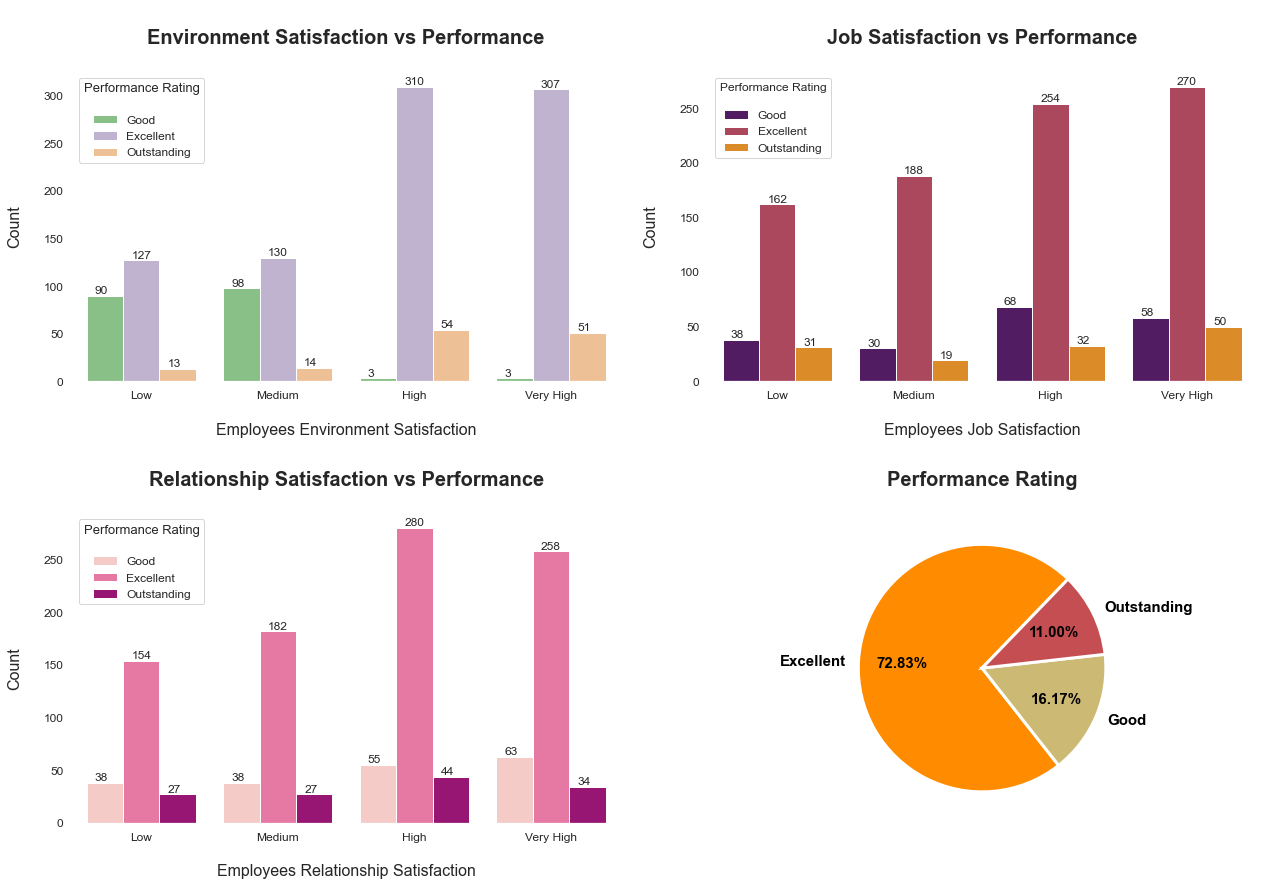

In [24]:
sns.set(rc={"font.size":12,"axes.titlesize":20,"axes.labelsize":16,"xtick.labelsize":12,"ytick.labelsize":12,
            "legend.fontsize":12,'axes.grid' : False,'axes.facecolor': 'white'})

#pie chart data
topic_4=[]
for i in df['PerformanceRating'].value_counts():
    topic_4.append(i)

wedgeprops = {"linewidth": 3, 'width':1, "edgecolor":"w"}
color = ["darkorange","y","r"]


plt.figure(figsize=(18,12))

#Countplot for Environment Satisfaction vs Performance
plt.subplot(2,2,1)
ax = sns.countplot(x=df['EmpEnvironmentSatisfaction'],hue= df["PerformanceRating"],palette='Accent')
plt.title("\nEnvironment Satisfaction vs Performance\n",fontweight="bold",fontsize=20)
plt.xticks(ticks=[0,1,2,3],labels=["Low","Medium","High","Very High"])
plt.xlabel("\nEmployees Environment Satisfaction\n\n\n")
plt.ylabel("Count\n")
legend = plt.legend(
           loc=2,  
           labels=["Good","Excellent","Outstanding"])
legend.set_title("Performance Rating\n",prop={"size":13})
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.06, p.get_height()+2))

plt.tight_layout(pad=20)

#Countplot for Job Satisfaction vs Performance
plt.subplot(2,2,2)
ax = sns.countplot(x=df['EmpJobSatisfaction'],hue= df["PerformanceRating"],palette='inferno')
plt.title("\nJob Satisfaction vs Performance\n",fontweight="bold",fontsize=20)
plt.xticks(ticks=[0,1,2,3],labels=["Low","Medium","High","Very High"])
plt.xlabel("\nEmployees Job Satisfaction")
plt.ylabel("Count\n")
legend = plt.legend(
           loc=2,  
           labels=["Good","Excellent","Outstanding"])
legend.set_title("Performance Rating\n",prop={"size":12})
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.06, p.get_height()+2))

plt.tight_layout(pad=2)
   
#countplot for Relationship Satisfaction vs Performance
plt.subplot(2,2,3)
ax = sns.countplot(x=df['EmpRelationshipSatisfaction'],hue= df["PerformanceRating"],palette='RdPu')
plt.title("\nRelationship Satisfaction vs Performance\n",fontweight="bold",fontsize=20)
plt.xticks(ticks=[0,1,2,3],labels=["Low","Medium","High","Very High"])
plt.xlabel("\nEmployees Relationship Satisfaction")
plt.ylabel("Count\n")
legend = plt.legend(
           loc=2,  
           labels=["Good","Excellent","Outstanding"])
legend.set_title("Performance Rating\n",prop={"size":13})
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.06, p.get_height()+2))

#pie chart for Performance Rating    
plt.subplot(2,2,4)
plt.pie(topic_4,labels=["Excellent","Good","Outstanding"],
        explode = [0,0,0], autopct = "%0.2f%%", startangle =46,
        pctdistance = 0.65,wedgeprops = wedgeprops,textprops = {"fontsize":15,"fontweight":"bold",'color':"black"},
        rotatelabels=False,
        colors = color) 
plt.title("Performance Rating\n",fontsize=20,fontweight='bold',)

        
plt.show()

 * Employees satisfication is divided into **3 category**. Namely,
              
              1.Relationship satisfaction.
              2.Employee Job Satisfaction.
              3.Employee Relationship Satisfaction.
              
 * Employees satisfaction rating is divided into 4 types in each category.
 * Company have
  
         1.Outstanding employees-11.00%.
         2.Excellent employees  -72.83%.
         3.Good employees       -16.17%.
         
              
        

# Current Role Experience vs Performance

In [25]:
#Using violin plot for Current Role Experience vs Performance
fig5 = px.violin(df, y="ExperienceYearsInCurrentRole", color="PerformanceRating", box=True, points="all",
                labels=dict(ExperienceYearsInCurrentRole="<b>Experience Years In Current Role</b>"),
                title="<b>Experience Years In Current Role vs Performance</b>",width=900,height=500,template="plotly")

fig5.update_layout(title_x=0.5,title_font_size=21,font_size=10,legend=dict(title="Performance Rating"),
                   paper_bgcolor="white",plot_bgcolor='white')

fig5 = customLegend(fig=fig5, nameSwap = {'3': 'Excellent', '2':'Good','4':"Outstanding"})
fig5.update_traces(orientation='v')

fig5.show()

* Company have less number of employee who have more than 9 years of experience.
* Most of employees have two years of experience in current job role.
* Fresher employees gives Excellent & Outstanding performance.
* As the experience year in current role increases, performance is decreases.

# Worklife Balance vs Performance Rating

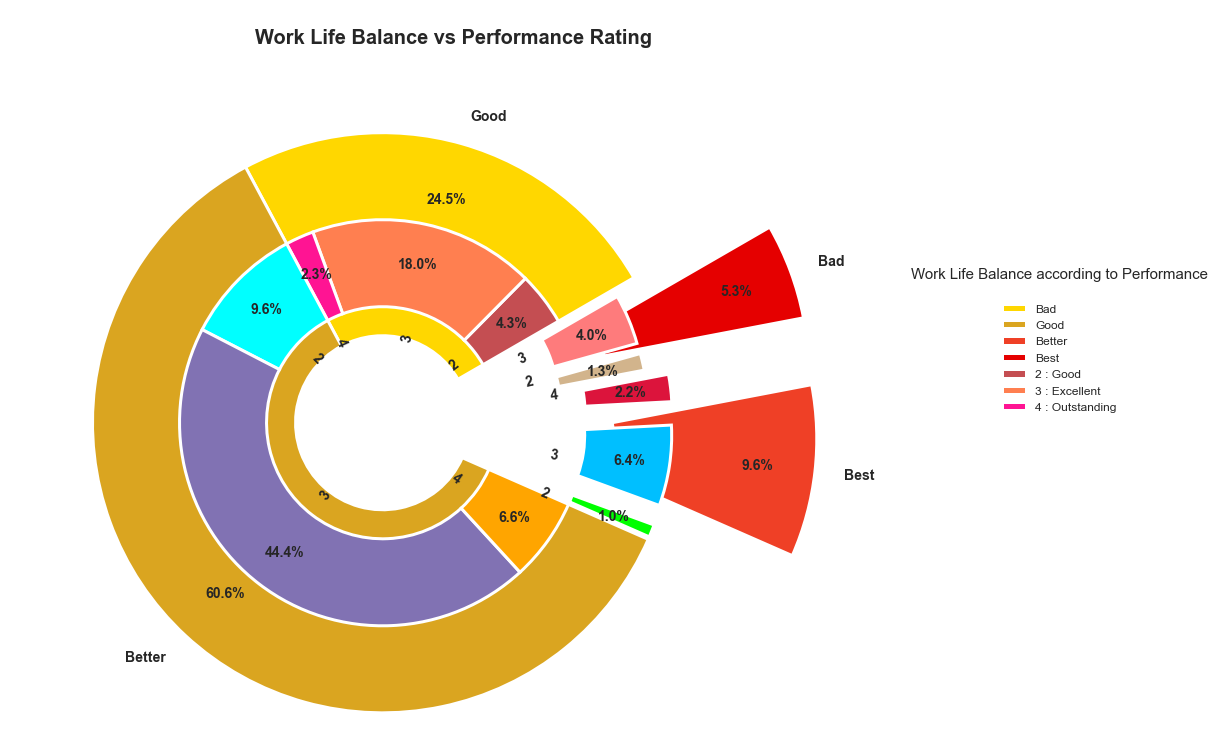

In [26]:
#Advance pie chart for Worklife Balance vs Performance Rating
plt.figure(figsize=(16,12))
plt.title("\nWork Life Balance vs Performance Rating\n\n",fontsize=20,fontweight="bold")

plt.pie([294,727,115,64],radius=1,
        colors=['gold','goldenrod','xkcd:tomato','xkcd:red'],
        labels=['Good','Better','Best','Bad'], 
        autopct='%.1f%%',explode=[0,0,0.5,0.5],startangle=30,
        pctdistance=0.80, textprops = {"fontsize":14,"fontweight":"bold"},
        wedgeprops=dict(width=0.7, edgecolor='white',linewidth=3))

plt.pie([51,216,27,115,533,79,12,77,26,16,48], radius=0.7,
        colors=['r','coral','deeppink','cyan','m','orange','lime','deepskyblue','crimson',
                'tan','xkcd:salmon pink',],
        explode=[0,0,0,0,0,0,0.30,0.30,0.30,0.22,0.22,],startangle=30,
        wedgeprops=dict(width=0.3, edgecolor='w',linewidth=3),textprops = {"fontsize":14,"fontweight":"bold"},
         labels=[2,3,4,2,3,4,2,3,4,2,3],autopct='%.1f%%',
        pctdistance=0.8, labeldistance=0.4, rotatelabels=True)

legend = plt.legend(bbox_to_anchor=(1,0.75),
          labels=['Bad','Good','Better','Best',
                  "2 : Good","3 : Excellent","4 : Outstanding"])

legend.set_title("Work Life Balance according to Performance\n",prop={"size":15})
legend.draw_frame(False)

plt.axis('equal')
plt.show()

# Employee Department vs Attrition Analysis

In [27]:
#Using Sunburst chart for Employee Department vs Attrition analysis
import plotly.graph_objects as go
fig6 = px.sunburst(df, path=["Attrition","EmpDepartment"],
                   color_discrete_sequence=["yellow","tomato"],
                   
                  title="<b>Employee Department vs Attrition analysis</b>",width=1000,height=500,template="plotly")

fig6.update_layout(title_x=0.5,title_font_size=20,font_size=10,legend=dict(title="Attrition"),
                   paper_bgcolor="white",plot_bgcolor="white")


fig6.show()

* In **Sales department** , attrition rate is **high** compared to other departments.
* In **Data Science & Finance Department**, attrition rate is **low**.

In [28]:
#Visualizing performance rating in all numerical features

num_cols = df.loc[:,['EmpEducationLevel','EmpEnvironmentSatisfaction', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction','EmpRelationshipSatisfaction','NumCompaniesWorked',
       'TrainingTimesLastYear','EmpWorkLifeBalance']]

num_cols.columns = ['Education Level','Environment Satisfaction', 'Job Involvement',
       'Job Level', 'Job Satisfaction','Relationship Satisfaction','Number of Companies Worked',
       'Training Times Last Year','Work Life Balance']

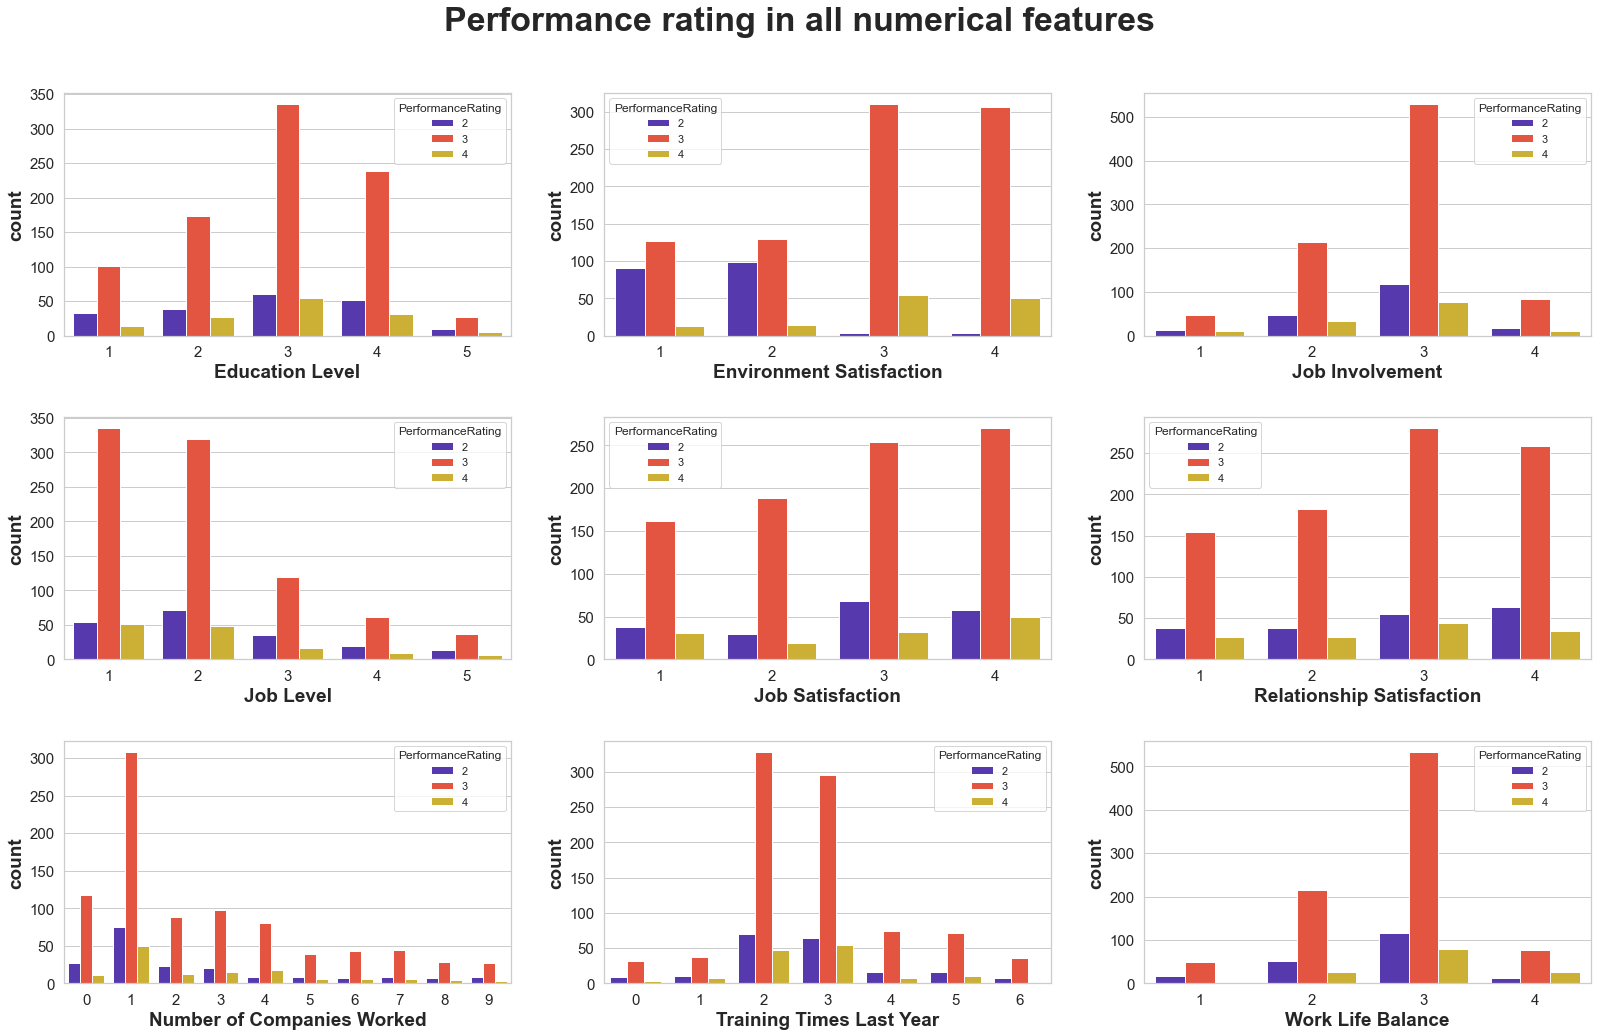

In [29]:
sns.set(rc={"font.size":12,"axes.titlesize":15,"axes.labelsize":19,"axes.labelweight":"bold","xtick.labelsize":15,
            "ytick.labelsize":15,'axes.grid' :False,'axes.facecolor':'white'})

## To plot the Performance Rating of all numerical Features

fig7 = plt.figure(figsize=(23,15))
fig7.suptitle("Performance rating in all numerical features",fontsize=34,fontweight="bold")
sns.set_style("whitegrid")
for index in range(len(num_cols.columns)):
    plt.subplot(3,3,index+1)
    sns.countplot(num_cols.iloc[:,index],hue=df["PerformanceRating"],palette='CMRmap')
fig7.tight_layout(pad=3)
fig7.subplots_adjust(top=0.90)

# Analysing Categorical Data

In [30]:
#Analysing object type data

obj_cols  = df.select_dtypes(include="object")
obj_cols.columns = ['Gender', 'Education Background', 'Marital Status', 'Employee Department',
       'Job Role', 'Business Travel Frequency', 'Over Time', 'Attrition']

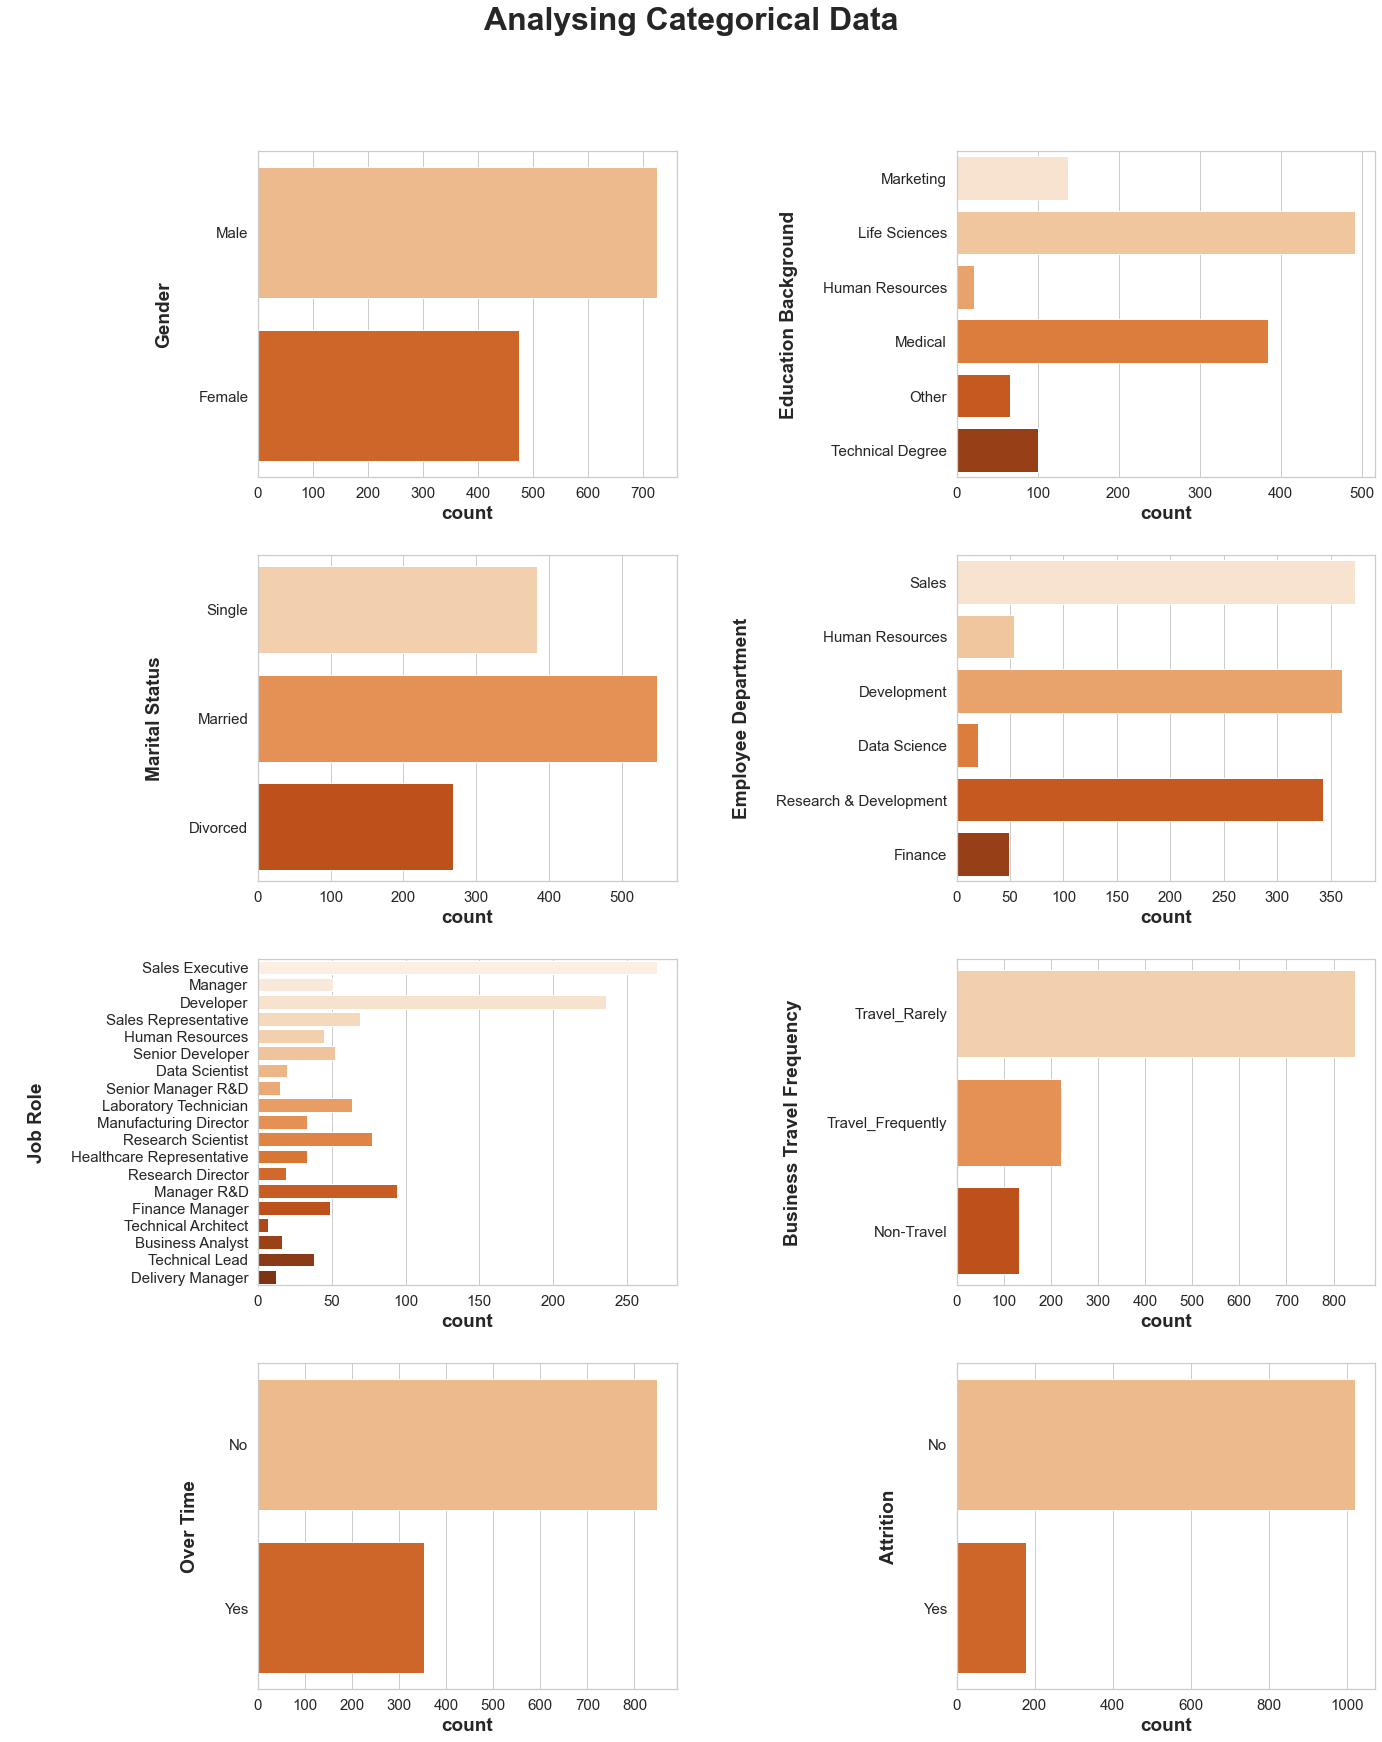

In [31]:
fig8 = plt.figure(figsize=(20,25))
fig8.suptitle("Analysing Categorical Data",fontsize=32,fontweight="bold")
sns.set_style('whitegrid')
for index in range(len(obj_cols.columns)):
    plt.subplot(4,2,index+1)
    sns.countplot(y=obj_cols.iloc[:,index],palette='Oranges')
    plt.ylabel(f"\n{obj_cols.columns[index]}\n")
fig8.tight_layout(pad=3)
fig8.subplots_adjust(top=0.90)

**From the above plots, we can get following insights:**

    * Educational backgrounds present in the employees is six unique backgrounds.
    * Nineteen unique employee job roles are present in this company.
    * Gender variance is divided by 60:40 for Male and Female employees in the company.
    * Job satisfaction level in this company is high for the majority of employees.
    * 85% of employees are not having attrition in their work.
    * 11% of employees in the company has achieved level 4 - performance rating.
    * Overall percentage of employees doing overtime is 30%.